#### Rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import SimilarityMaps

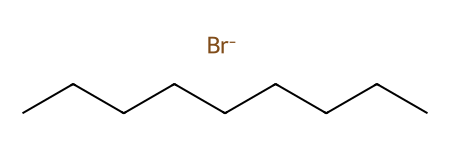

In [ ]:
''' loading molecules from Vectors in SMILES string/representation '''
smiles_str = "[Br-].CCCCCCCCC"
molecule = Chem.MolFromSmiles(smiles_str)
molecule

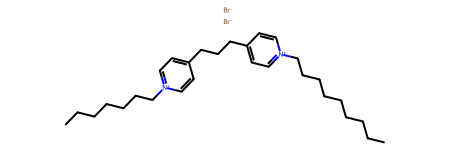

In [ ]:
smiles_str = "[Br-].[Br-].CCCCCCC[N+]1=CC=C(CCCC2=CC=[N+](CCCCCCCCC)C=C2)C=C1"
molecule = Chem.MolFromSmiles(smiles_str)
molecule

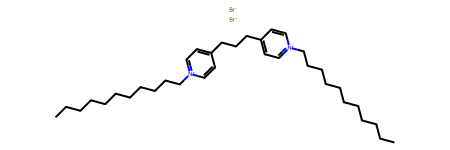

In [ ]:
smiles_str = "[Br-].[Br-].CCCCCCCCCCC[N+]1=CC=C(CCCC2=CC=[N+](CCCCCCCCCCC)C=C2)C=C1"
molecule = Chem.MolFromSmiles(smiles_str)
molecule

In [ ]:
df = pd.read_csv('dataset_toxicity.csv')

In [ ]:
df.head()

,ID,smiles,toxic,FormalCharge,TPSA,MolWt,HeavyAtoms,NHOH,HAcceptors,HDonors,Heteroatoms,AromaticRings,SaturatedRings,AromaticOH,AromaticN,LogP
0,25239916,c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...,0,-2,81.65,987.667498,33,0,5,0,13,3,0,0,0,7.4338
1,25239917,CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H...,0,1,123.69,407.553000,27,6,7,6,9,0,2,4,0,-2.2741
2,25239918,CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)...,0,0,92.35,464.831000,32,3,4,3,11,3,0,0,1,5.5497
3,25239919,CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-],0,-1,60.44,250.299000,17,0,4,0,5,2,0,0,0,1.8099
4,25239920,CC(C)c1ccc2c(c1)c(=O)c3cc(c(nc3o2)N)C(=O)[O-],0,-1,109.25,297.290000,22,2,6,1,6,3,0,0,1,1.4103


In [ ]:
df['smiles'][0], df['smiles'][1], df['smiles'][2], df['smiles'][3]

('c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[131I])[O-])[131I])C24c5c(c(c(c(c5Cl)Cl)Cl)Cl)C(=O)O4',
 'CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H]2[C@@H]([C@@H]([C@H]([C@H](O2)SC)O)O)O)[C@@H](C)O',
 'CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)C(F)(F)F)Cl',
 'CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-]')

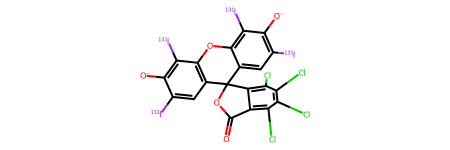

In [ ]:
Chem.MolFromSmiles(df['smiles'][0])

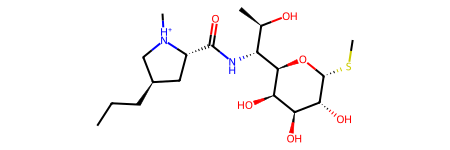

In [ ]:
Chem.MolFromSmiles(df['smiles'][1])

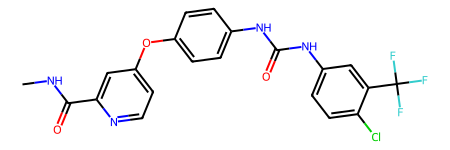

In [ ]:
Chem.MolFromSmiles(df['smiles'][2])

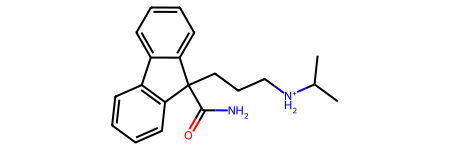

In [ ]:
Chem.MolFromSmiles(df['smiles'][10])

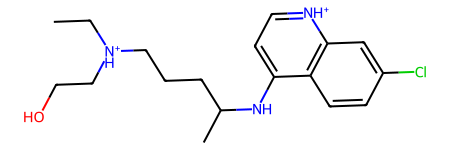

In [ ]:
molecule = Chem.MolFromSmiles(df['smiles'][20])
molecule

In [ ]:
from rdkit.Chem.Draw import SimilarityMaps, IPythonConsole
from rdkit.Chem import Draw
d2d = Draw.MolDraw2DCairo(400, 400)

AllChem.ComputeGasteigerCharges(molecule)
contribs = [molecule.GetAtomWithIdx(1).GetDoubleProp('_GasteigerCharge')
            for i in range(molecule.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(
    molecule, contribs, draw2d=d2d, contourLines=10)
fig

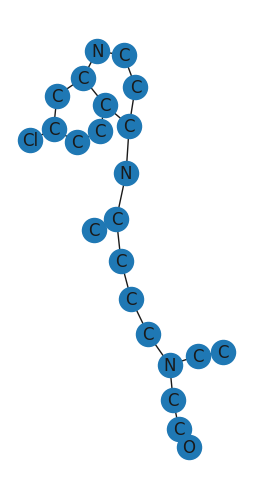

In [ ]:
from pysmiles import read_smiles
import networkx as nx
smiles = df.smiles[20]
mol = read_smiles(smiles)
elements = nx.get_node_attributes(mol, name='element')
nx.draw(mol, with_labels=True, labels=elements, pos=nx.spring_layout(mol))
plt.gca().set_aspect('equal')

In [ ]:
df.columns

Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
       'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
       'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
      dtype='object')